### IMPORTACION DE LIBRERIAS NECESARIAS

In [1]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

### FUNCION PARA LA CONEXION CON LA DB

In [2]:
def db_conn(host, user, password, db):
    try:
        conn = pymysql.connect(host=host,user=user,password=password,db=db)
        return conn
    except Exception as e:
        print(e)
        return False

### FUNCION PARA EJECUCION DE QUERY CONTRA LA DB

In [3]:
def execute_db_query(conector, query):
    try:
        cur = conector.cursor() 
        cur.execute(query) 
        output = cur.fetchall() 
        return output
    except Exception as e:
        print(e)
        return False

### FUNCION PARA LA DESCONECXION DE LA DB

In [4]:
def db_close_conn(connector):
    try:
        connector.close()
        return True
    except Exception as e:
        print(e)
        return False

### USO DE LAS FUNCIONES

[+] Conectados a la DB
[+] Datos extraidos de la DB
    0   1   2                                             3       4    5   6   \
0  892   0   3                              Kelly, Mr. James    male  34.   0   
1  893   1   3              Wilkes, Mrs. James (Ellen Needs)  female   47   1   
2  894   0   2                     Myles, Mr. Thomas Francis    male   62   0   
3  895   0   3                              Wirz, Mr. Albert    male   27   0   
4  896   1   3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   22   1   

   7        8        9  10 11  
0   0   330911   7.8292     Q  
1   0   363272        7     S  
2   0   240276   9.6875     Q  
3   0   315154   8.6625     S  
4   1  3101298  12.2875     S  
Kelly, Mr. James
[+] Desconnectados de la DB


1
0    266
1    152
Name: count, dtype: int64

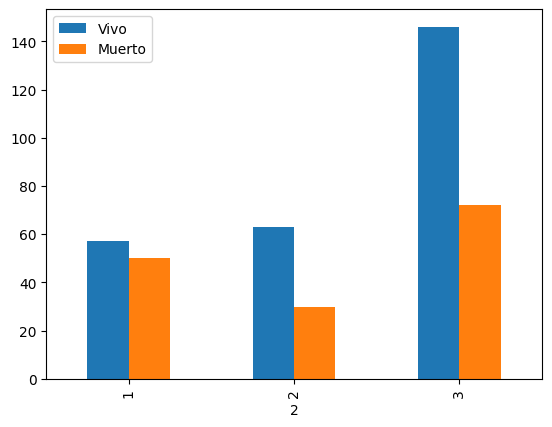

In [9]:
# Conectar con la DB
db_connector = db_conn("127.0.0.1", "IMPELIA", "1234", "ml-tests")
if db_connector:
    print("[+] Conectados a la DB")
    
    # Extraer todos los datos de la DB
    data = execute_db_query(db_connector, "select * from titanic")
    if data:
        print("[+] Datos extraidos de la DB")
        
        # Conversion a PD.DataFrame
        data_frame = pd.DataFrame(data)
        print(data_frame.head())

        # Como acceder a una columna y elemento de la columna
        print(data_frame[3][0])

        # Graficar con matplotlib (barras) las personas vivas y muertas en funcion de la clase del billete (1,2,3)
        df2 = data_frame.copy()

        a = df2.groupby([2,1])[1].count().unstack().plot(kind = 'bar')
        a.xlabel = "Clase de billete"
        a.ylabel = "Personas"
        a.legend(["Vivo", "Muerto"])

        # Graficar con matplotlib (lineas) las personas vivas y muertas en funcion de la clase del billete (1,2,3)
        
        
    else:
        print("[-] Error ejecutando la Query")

    # deconnectar de la DB
    close_db_conn = db_close_conn(db_connector)
    if close_db_conn:
        print("[+] Desconnectados de la DB")
    else:
        print("[-] Error al desconnectar de la DB")
else:
    print("[-] Error al conectar con la DB")

# Contabilizar una columna
conteo = data_frame[1].value_counts()
conteo